# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [195]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier

#ussed for regression tasks
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# For classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report


In [148]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [149]:
df.dropna(inplace=True)

In [150]:
def clean_name(col):
    df[col] = df[col].astype(str).str.strip().str[0]
    return df[col] 

clean_name("Cabin")

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin, Length: 6606, dtype: object

In [151]:
df.drop(columns=['PassengerId', 'Name'], inplace=True)

In [152]:
df['home_planet'] = df['HomePlanet'].map({'Mars': 0, 'Europa': 1, 'Earth': 2}).fillna(0).astype(int)
df['cryo_sleep'] = df['CryoSleep'].map({False: 0, True: 1})
df['cabin'] = df['Cabin'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
df['destination'] = df['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e':2}).fillna(0).astype(int)
df['vip'] = df['VIP'].map({False: 0, True: 1})
df['transported'] = df['Transported'].map({False: 0, True: 1})

In [153]:
dfv1 = df.copy()

In [154]:
dfv1.drop(columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported'], inplace=True)

In [155]:
dfv1.columns = dfv1.columns.str.lower()

In [156]:
dfv1

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,home_planet,cryo_sleep,cabin,destination,vip,transported
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,2,0,5,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,2,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,2,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,2,1,6,1,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,2,0,6,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,4,2,0,0


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [157]:
features = dfv1.drop(columns = ["transported"]) # Features  = X
target = dfv1["transported"] 

**Perform Train Test Split**

In [158]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

In [159]:
normalizer = StandardScaler()
normalizer.fit(X_train)

StandardScaler()

In [160]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [161]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [ ]:
#your code here
model_bg_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [ ]:
model_bg_dt.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [ ]:
y_pred = model_bg_dt.predict(X_test)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       677
           1       0.76      0.61      0.67       645

    accuracy                           0.71      1322
   macro avg       0.72      0.71      0.71      1322
weighted avg       0.72      0.71      0.71      1322



- Random Forests

In [167]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [ ]:
#your code here
model_bg_rf = BaggingClassifier(RandomForestClassifier(n_estimators=100,
                             max_depth=20))

In [ ]:
model_bg_rf.fit(X_train_norm, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=20))

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53       662
           1       0.47      0.37      0.41       660

    accuracy                           0.48      1322
   macro avg       0.48      0.48      0.47      1322
weighted avg       0.48      0.48      0.47      1322



- Gradient Boosting

In [177]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [ ]:
model_bg_gb = BaggingClassifier(GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100))

In [ ]:
model_bg_gb.fit(X_train_norm, y_train)

BaggingClassifier(estimator=GradientBoostingClassifier(max_depth=20))

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.59      0.52       652
           1       0.47      0.36      0.41       670

    accuracy                           0.47      1322
   macro avg       0.47      0.48      0.47      1322
weighted avg       0.47      0.47      0.47      1322



- Adaptive Boosting

In [184]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [185]:
model_ab_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

In [186]:
model_ab_dt.fit(X_train_norm, y_train)

c:\Users\estif\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.61      0.54       638
           1       0.52      0.39      0.44       684

    accuracy                           0.50      1322
   macro avg       0.50      0.50      0.49      1322
weighted avg       0.50      0.50      0.49      1322



Which model is the best and why?

C:\Users\estif\AppData\Local\Temp\ipykernel_24748\3740273014.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame.from_dict({'Model': [name], 'Dataset': ['Train'], 'Accuracy': [accuracy_train], 'F1': [f1_train]})], ignore_index=True)
c:\Users\estif\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


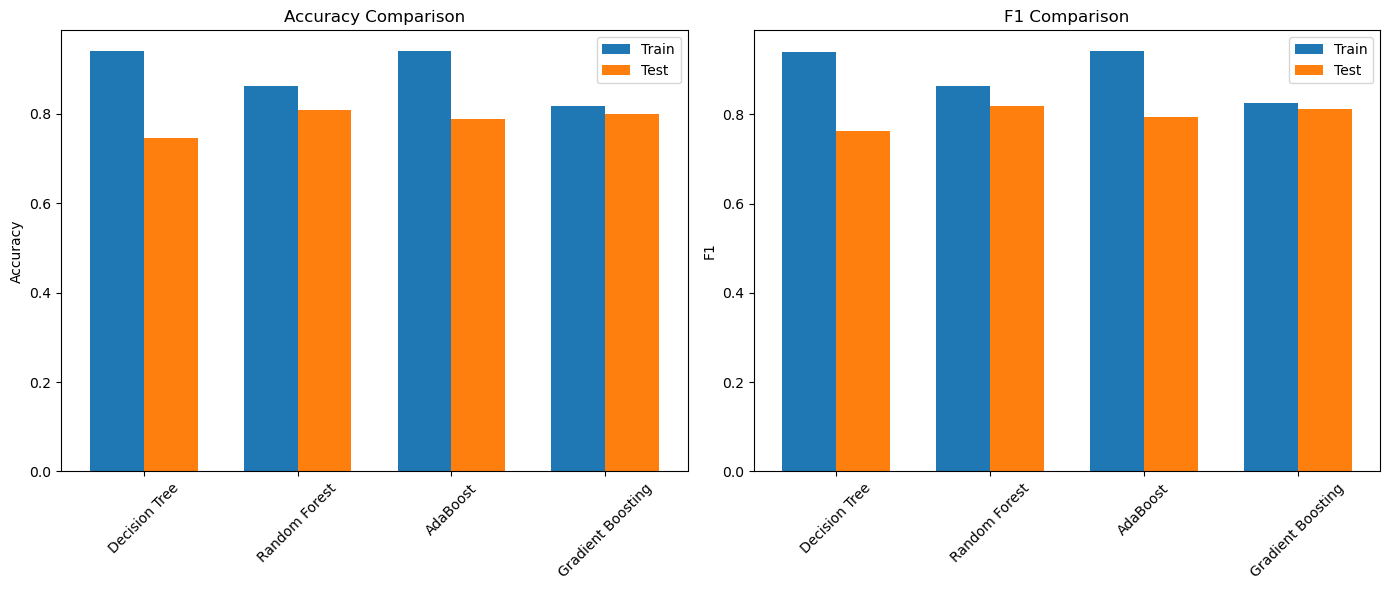

In [196]:
# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=10, random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                            n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'F1'])

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_norm, y_train)
    
    # Predict on training data
    y_train_pred = model.predict(X_train_norm)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    # Predict on testing data
    y_test_pred = model.predict(X_test_norm)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    # Append results to the DataFrame
    results = pd.concat([results, pd.DataFrame.from_dict({'Model': [name], 'Dataset': ['Train'], 'Accuracy': [accuracy_train], 'F1': [f1_train]})], ignore_index=True)
    results = pd.concat([results, pd.DataFrame.from_dict({'Model': [name], 'Dataset': ['Test'], 'Accuracy': [accuracy_test], 'F1': [f1_test]})], ignore_index=True)

# Define models and metrics
models = results['Model'].unique()
metrics = ['Accuracy', 'F1']
datasets = ['Train', 'Test']
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Create subplots for RMSE and R²
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    # Extract metric values for Train and Test
    train_values = results[results['Dataset'] == 'Train'][metric]
    test_values = results[results['Dataset'] == 'Test'][metric]
    
    # Plot bars side by side
    ax.bar(x - width/2, train_values, width, label='Train')
    ax.bar(x + width/2, test_values, width, label='Test')
    
    # Set titles and labels
    ax.set_title(f'{metric} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()

In [197]:
best_f1_row = results[(results['Dataset'] == 'Test')].sort_values(by='F1', ascending=False).iloc[0]

best_model_name = best_f1_row['Model']
best_f1_score = best_f1_row['F1']

print(f"Best model based on Test F1 score: {best_model_name} with F1 = {best_f1_score:.4f}")

Best model based on Test F1 score: Random Forest with F1 = 0.8179


In [200]:
print(results)

               Model Dataset  Accuracy        F1
0      Decision Tree   Train  0.939818  0.940561
1      Decision Tree    Test  0.746596  0.762580
2      Random Forest   Train  0.861847  0.864715
3      Random Forest    Test  0.808623  0.817855
4           AdaBoost   Train  0.939818  0.941415
5           AdaBoost    Test  0.788200  0.795322
6  Gradient Boosting   Train  0.818509  0.825032
7  Gradient Boosting    Test  0.798790  0.812147


In [ ]:
'''
Based on the provided data, the Random Forest model appears to be the best. 🏆

Random Forest has the highest Test F1 score (0.817855) and the highest Test Accuracy (0.808623). These are the most important metrics as they indicate how well the model performs on unseen data.
While the Decision Tree and AdaBoost models show higher training scores, they exhibit a significant drop in performance on the test set, indicating overfitting.
Gradient Boosting shows the least overfitting (smallest gap between train and test scores), but its test performance is slightly lower than Random Forest.

'''

"\nBased on the provided data, the Random Forest model appears to be the best. 🏆\n\nHere's a breakdown:\n\nRandom Forest has the highest Test F1 score (0.817855) and the highest Test Accuracy (0.808623). These are the most important metrics as they indicate how well the model performs on unseen data.\nWhile the Decision Tree and AdaBoost models show higher training scores, they exhibit a significant drop in performance on the test set, indicating overfitting.\nGradient Boosting shows the least overfitting (smallest gap between train and test scores), but its test performance is slightly lower than Random Forest.\n\n"